# Process EDA

In [21]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns

In [4]:
# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

In [5]:
# Calculate mean tonic eda for each quartile and each subject for sessions 1-5b

quartile_means = {}

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']

# Loop through sessions
for session_file, session_name in zip(sessions, session_names):
    quartile_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                # Divide the data into quarters and calculate means
                df_session['quarter'] = pd.qcut(df_session.index, 4, labels=[1, 2, 3, 4])
                means_session = df_session.groupby('quarter')['EDA_Tonic'].mean().to_list()
                quartile_means[session_name].append([sub_dir] + means_session)

    columns = ['subject', 'Q1', 'Q2', 'Q3', 'Q4']
    quartile_means[session_name] = pd.DataFrame(quartile_means[session_name], columns=columns)

# Display one df
print(quartile_means['session1'])

  subject        Q1        Q2        Q3        Q4
0   sub-6  5.776687  6.070699  5.705069  5.283036
1   sub-1  5.328523  5.271258  5.060585  5.166165
2   sub-8  0.019276  0.020341  0.020120  0.024160
3   sub-9  0.073787  0.080383  0.083209  0.085792
4   sub-7  0.294237  0.323180  0.310546  0.278159
5  sub-10  0.057708  0.059483  0.060325  0.062366
6  sub-11  0.148718  0.169042  0.196256  0.203370
7   sub-2  1.062807  1.179251  1.236865  1.271251
8   sub-4  0.039381  0.041873  0.044202  0.046656
9   sub-3  3.128699  2.882827  2.585796  2.376796


In [19]:
# Calculate mean tonic eda for each subject for sessions 1-5b

session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_tonic_eda = df_session['EDA_Tonic'].mean()
                session_means[session_name].append([sub_dir, mean_tonic_eda])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_tonic_eda'])

# Display one df
print(session_means['session1'])

  subject  mean_tonic_eda
0   sub-6        5.708873
1   sub-1        5.206632
2   sub-8        0.020974
3   sub-9        0.080793
4   sub-7        0.301530
5  sub-10        0.059970
6  sub-11        0.179346
7   sub-2        1.187510
8   sub-4        0.043028
9   sub-3        2.743530


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

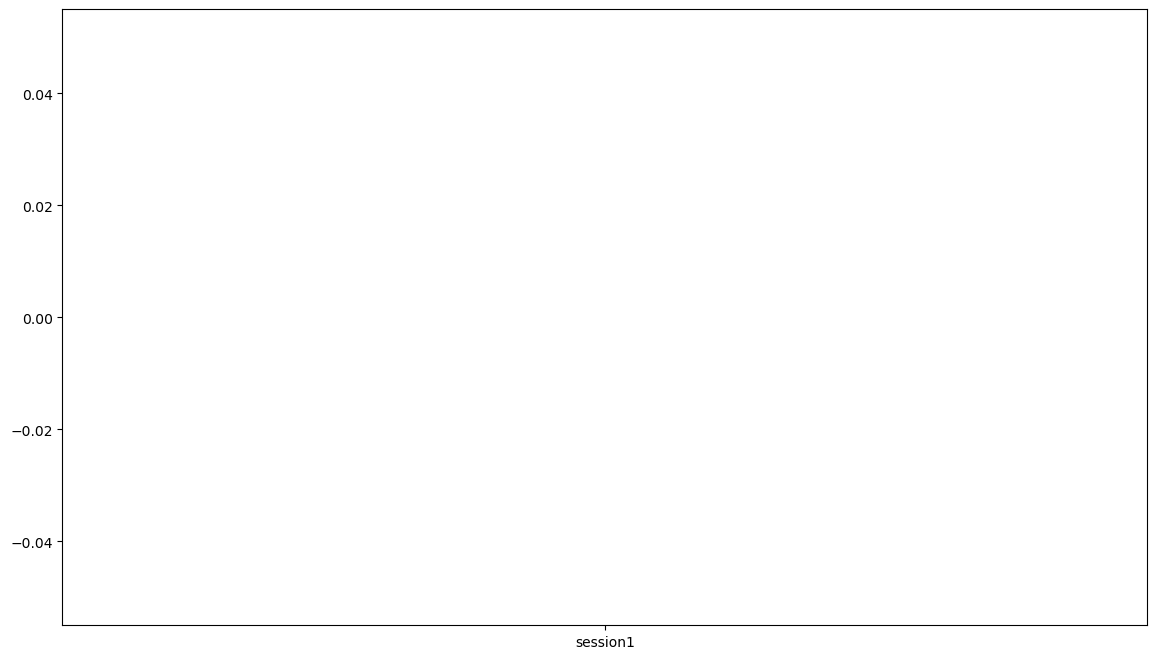

In [20]:
# Plot each subject's mean tonic EDA for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])

plt.figure(figsize=(14, 8))

labels = ['Session 1 \n Apartment A', 
          'Session 2\n Apartment B', 
          'Session 3\n Apartment C', 
          'Session 4\n Apartment C', 
          'Session 5\n Apartment A \n (Distant Condition)',
          'Session 5\n Apartment B \n (Near Condition)']

for subject in df_all_sessions['subject'].unique():
    df_subject = df_all_sessions[df_all_sessions['subject'] == subject]
    sns.lineplot(data=df_subject, x='session', y='mean_tonic_eda', marker='s', markersize=10, label=subject)

plt.title(None)
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Tonic EDA \n', fontsize = 14)
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.tight_layout()
sns.despine()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/all-participant-session-means.png", dpi=300)

In [ ]:
# Plot each mean tonic EDA across subjects for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name
    all_sessions.append(df)
df_all_sessions = pd.concat(all_sessions, ignore_index=True)

plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_tonic_eda', errorbar='se', color = '#05ace8')
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Tonic EDA \n', fontsize = 14)
plt.tight_layout()
sns.despine()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)

AttributeError: 'Rectangle' object has no property 'errorbar'

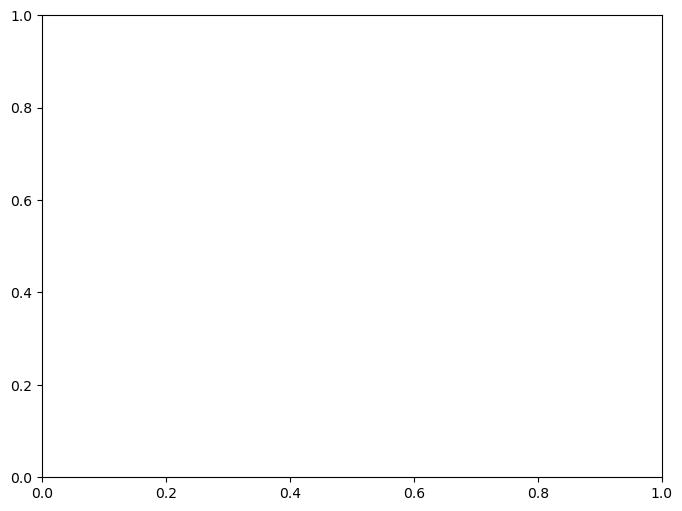

In [23]:
# Plot baseline & test mean tonic EDA across subjects for Apartment A and Apartment B 
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

filtered_df = df_all_sessions[df_all_sessions['session'].isin(
    ['session1', 'session2', 'session5a', 'session5b'])].reset_index(drop=True)

filtered_df['group'] = filtered_df['session'].map({
    'session1': 'baseline',
    'session2': 'baseline',
    'session5a': 'test',
    'session5b': 'test'})

filtered_df['apartment'] = filtered_df['session'].map({
    'session1': 'Apartment A',
    'session2': 'Apartment B',
    'session5a': 'Apartment A',
    'session5b': 'Apartment B'})

plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, x='apartment', y='mean_tonic_eda', hue='group', errorbar='se', palette=['#05ace8', '#343bbf'])
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.ylabel('Mean Tonic EDA \n', fontsize = 14)
plt.legend(title=None, fontsize=14)
plt.tight_layout()
sns.despine()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/baseline-vs-test.png", dpi=300)